In [1]:
import math
import datetime
import pandas as pd
import pandas_datareader as web
import numpy as np
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [2]:
yf.pdr_override()
df = pdr.get_data_yahoo('NVDA', start='2010-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,4.627500,4.655000,4.527500,4.622500,4.240230,80020400
2010-01-05,4.605000,4.740000,4.605000,4.690000,4.302150,72864800
2010-01-06,4.687500,4.730000,4.642500,4.720000,4.329667,64916800
2010-01-07,4.695000,4.715000,4.592500,4.627500,4.244816,54779200
2010-01-08,4.590000,4.670000,4.562500,4.637500,4.253989,47816800
...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800


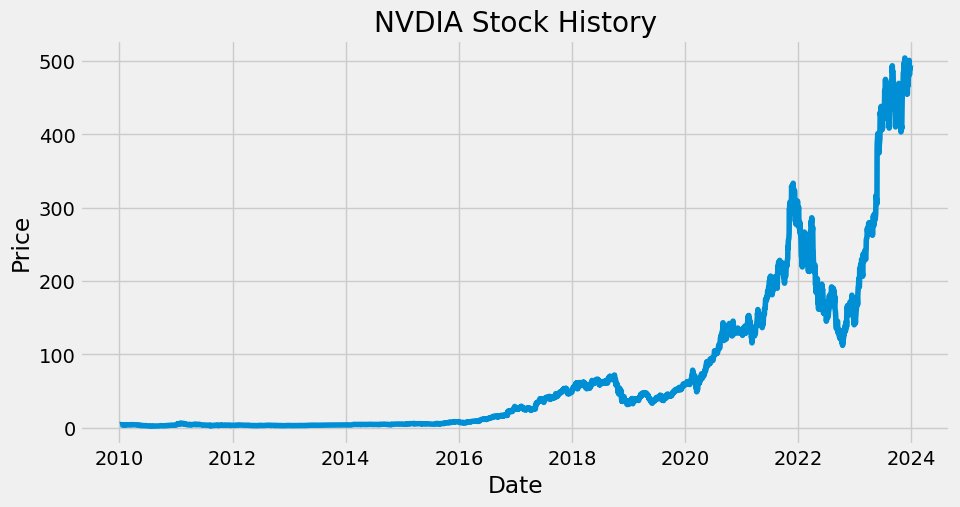

In [4]:
plt.figure(figsize=(10,5))
plt.title('NVDIA Stock History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Adj Close'])

In [5]:
data = df.filter(['Adj Close'])
dataset = data.values # convert to numpy array
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2818

In [6]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [12]:
len(scaled_data)

3522

In [26]:
train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i-60:i,0])
    